In [2]:
%matplotlib inline

### load the modules 
(if you are using astropy verion older than 1.0.5, below you may see a warning about IPython.kernel being deprecated. See https://github.com/astropy/astropy/pull/4078 )

In [3]:
from lsst.cwfs.instru import cwfsInstru
from lsst.cwfs.algo import cwfsAlgo
from lsst.cwfs.image import cwfsImage
import lsst.cwfs.plots as plot

### Define the image objects. Input arguments: file name, field coordinates in deg, image type

In [4]:
I1=cwfsImage('./testImages/LSST_NE_SN25/z11_0.25_intra.txt',[1.185,1.185],'intra')
I2=cwfsImage('./testImages/LSST_NE_SN25/z11_0.25_extra.txt',[1.185,1.185],'extra')

### Define the instrument. Input arguments: instrument name, size of image stamps

In [5]:
inst=cwfsInstru('lsst',I1.sizeinPix)

### Run everything automatically, and print the Zernikes

In [6]:
algo=cwfsAlgo('exp',inst,1)
algo.runIt(inst,I1,I2,'offAxis')
print(algo.zer4UpNm)

[   2.59351588   14.10235606   -8.46968413    3.67630955    1.46655994
   -9.72420286    8.20734676 -192.83918198    0.97790453    1.5681737
    4.19718439   -0.39186716    1.55105036    1.23529318   -1.69943129
    2.1400894    -0.29556192   -2.11321047    1.18836412]


### Now we decide to chang the base algorithm from 'exp' to 'fft', and step through the iterations manually

In [7]:
algo=cwfsAlgo('fft',inst,3)
algo.itr0(inst,I1,I2,'offAxis')

resetting images
resetting images, inside
imageCoCenter: (x1,y1)=(   63.22,   63.21)

imageCoCenter: (x1,y1)=(   62.49,   62.44)

iOuter=0, cliplevel=0.33
(128, 128)
itr = 0, z4-z22
[  50.   54.   -6. -109. -111.  -70.   67. -139.    0.   31.   59.   -2.
   39.   39.   -7.    7.  -12.  -13.    7.]


### Look at the wavefront signal image

/Applications/miniconda/envs/p3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


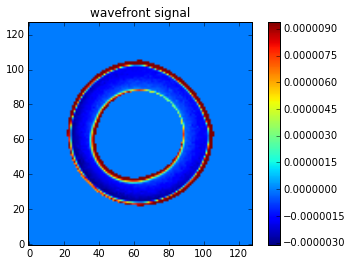

In [8]:
plot.plotImage(algo.S,'wavefront signal')

### Do 2 more iterations

iOuter=1, cliplevel=0.33
(128, 128)
itr = 1, z4-z22
[  42.   98.   -6.  -72.  -73.  -52.   49. -142.    0.    6.   51.   -2.
   35.   35.   -2.    2.    4.    3.    8.]


/Applications/miniconda/envs/p3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


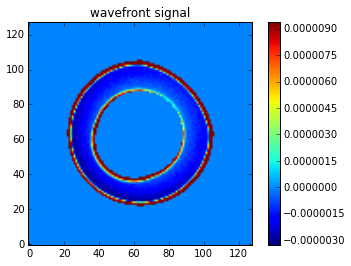

iOuter=2, cliplevel=0.33
(128, 128)
itr = 2, z4-z22
[  41.   60.   -7.  -62.  -64.  -37.   35. -144.    1.    4.   55.   -2.
   32.   32.   -7.    7.    6.    5.    9.]


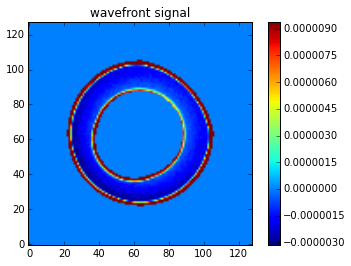

In [9]:
algo.nextItr(inst,I1,I2,'offAxis')
plot.plotImage(algo.S,'wavefront signal')
algo.nextItr(inst,I1,I2,'offAxis')
plot.plotImage(algo.S,'wavefront signal')

### continue, and finish the rest of the 14 iterations. Check the wavefront signal image at the end

iOuter=3, cliplevel=0.39
(128, 128)
itr = 3, z4-z22
[  34.   36.   -9.  -52.  -56.  -20.   18. -145.    1.    7.   59.   -3.
   27.   27.   -5.    4.    5.    4.    9.]
iOuter=4, cliplevel=0.39
(128, 128)
itr = 4, z4-z22
[  28.   27.  -10.  -45.  -49.  -14.   14. -145.    1.    8.   60.   -3.
   24.   24.   -4.    3.    4.    3.    9.]
iOuter=5, cliplevel=0.45
(128, 128)
itr = 5, z4-z22
[  10.   63.   -6.  -32.  -36.  -55.   53. -171.    0.   -6.   54.   -2.
   16.   16.   -7.    6.    4.    3.    4.]
iOuter=6, cliplevel=0.45
(128, 128)
itr = 6, z4-z22
[  13.   -9.   -1.  -15.  -21.  -24.   25. -183.    0.   -4.   44.   -2.
    9.    8.   -2.    1.   -1.   -4.    2.]
iOuter=7, cliplevel=0.51
(128, 128)
itr = 7, z4-z22
[  11.    2.   -7.   -8.  -13.  -23.   21. -188.    1.   -4.   30.   -2.
    6.    5.   -1.    1.   -1.   -3.    1.]
iOuter=8, cliplevel=0.51
(128, 128)
itr = 8, z4-z22
[  10.   16.   -7.   -3.   -6.  -20.   18. -191.    1.   -4.   17.   -2.
    4.    3.   -1.    1.   -3.

/Applications/miniconda/envs/p3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


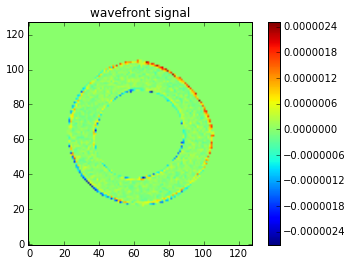

In [10]:
algo.runIt(inst,I1,I2,'offAxis')
plot.plotImage(algo.S,'wavefront signal')

### switch back to the 'exp' algorithm

In [11]:
algo=cwfsAlgo('exp',inst,1)

### run one iteration manually

In [12]:
algo.nextItr(inst,I1,I2,'offAxis')
print('Current Iteration No = %d'%algo.currentItr)

Current Iteration No = 1


### change debug level and run 2 more iterations

In [13]:
algo.setDebugLevel(3)
algo.nextItr(inst,I1,I2,'offAxis',2)

itr = 1, z4-z22
[  85.  -37.   -5.   40.   39.  -44.   41. -145.    1.    4.   22.   -1.
    9.    9.   -4.    5.    2.    1.    9.]
itr = 2, z4-z22
[  92.  -68.   -5.   55.   54.  -56.   53. -148.    1.   12.   19.   -1.
    3.    3.   -7.    8.   -1.   -2.   11.]


### finish the rest of the 14 iterations

In [14]:
algo.runIt(inst,I1,I2,'offAxis')

itr = 3, z4-z22
[  90. -101.   -7.   58.   56.  -63.   59. -149.    1.   14.   16.   -1.
    1.    0.   -7.    8.   -0.   -2.   12.]
itr = 4, z4-z22
[ 112.  -91.   -7.   17.   13.  -53.   50. -144.    0.   13.   18.   -1.
   14.   13.   -6.    6.    6.    4.   10.]
itr = 5, z4-z22
[  51.   81.   -7.  -49.  -51.  -53.   48. -171.    0.   -5.   10.   -1.
   25.   25.   -6.    6.   -4.   -6.    7.]
itr = 6, z4-z22
[   3.   56.   -9.  -20.  -24.  -15.   13. -189.    1.   -3.    9.   -1.
   12.   11.   -2.    3.   -4.   -6.    6.]
itr = 7, z4-z22
[  -6.   28.   -5.    4.   -1.    1.   -0. -194.    1.   -2.    1.   -1.
    4.    3.   -1.    1.   -3.   -5.    3.]
itr = 8, z4-z22
[   1.   20.   -7.    2.   -5.   -5.    5. -194.    1.   -0.    5.   -1.
    3.    2.   -1.    2.   -1.   -3.    2.]
itr = 9, z4-z22
[   2.   20.   -8.    3.   -1.   -8.    7. -193.    1.    0.    4.   -0.
    2.    1.   -1.    2.   -0.   -2.    1.]
itr = 10, z4-z22
[   2.   18.   -8.    4.    0.   -9.    7. -193.    

### If you want to keep iterating, we will be using the parameters from the Iter No. algo.outerItr

In [15]:
print(algo.outerItr)
print(algo.debugLevel)
algo.nextItr(inst,I1,I2,'offAxis',2)

14
3
itr = 14, z4-z22
[   3.   14.   -8.    4.    1.  -10.    8. -193.    1.    2.    4.   -0.
    2.    1.   -2.    2.   -0.   -2.    1.]
itr = 14, z4-z22
[   3.   14.   -8.    4.    2.  -10.    8. -193.    1.    2.    4.   -0.
    2.    1.   -2.    2.   -0.   -2.    1.]


### plot the Zernikes Zn (n>=4)

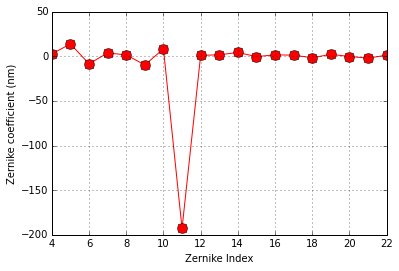

In [16]:
algo.setDebugLevel(0)
plot.plotZer(algo.zer4UpNm,'nm')